In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/non_linear_regression.csv")

In [3]:
dataset.head(3)

,Age,Experience,Salary
0,58,13,701136
1,48,39,1773631
2,34,21,573885


In [4]:
dataset.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

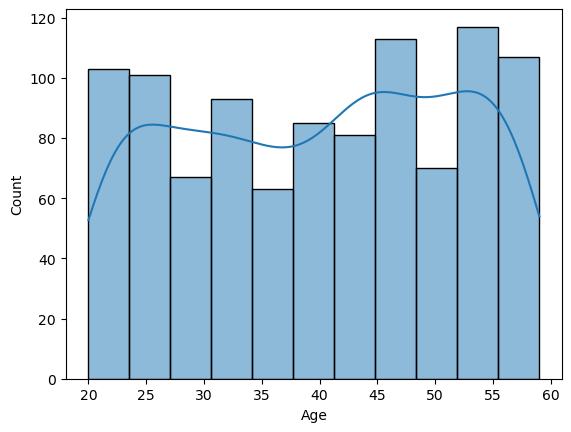

In [26]:
sns.histplot(dataset["Age"],kde=True)
plt.show()

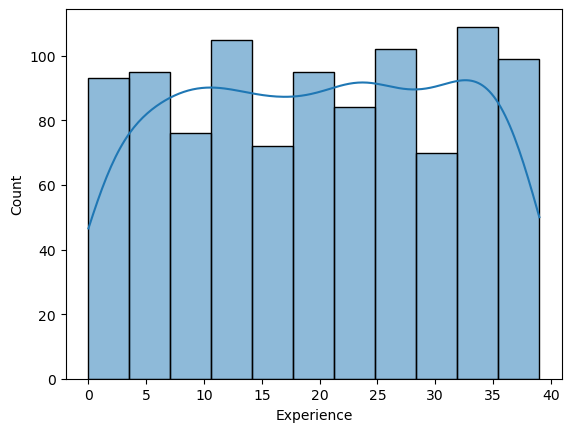

In [27]:
sns.histplot(dataset["Experience"],kde=True)
plt.show()

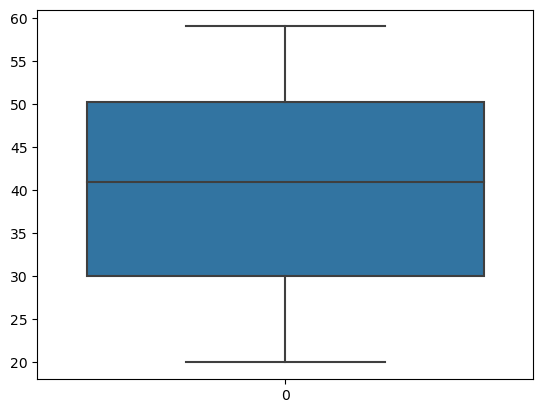

In [28]:
sns.boxplot(dataset["Age"])
plt.show()

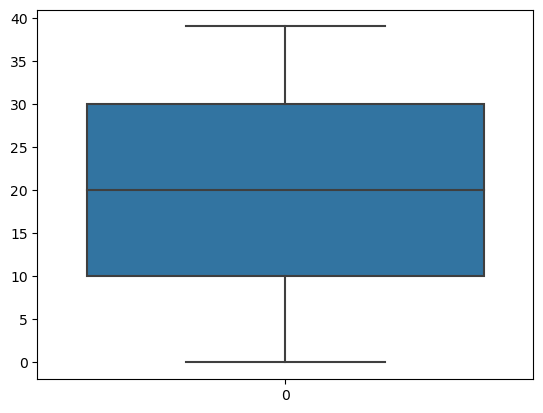

In [29]:
sns.boxplot(dataset["Experience"])
plt.show()

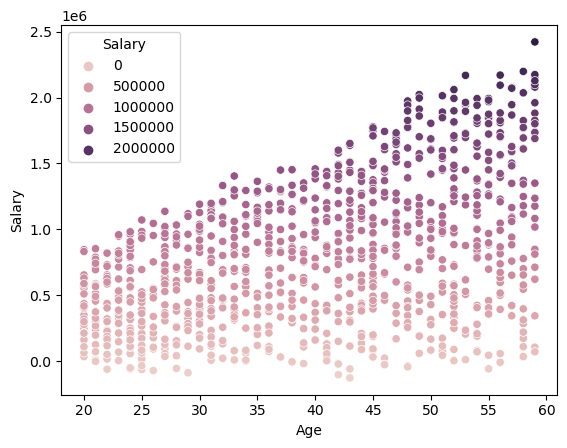

In [5]:
sns.scatterplot(x="Age",y="Salary",data=dataset,hue="Salary")
plt.show()

In [6]:
dataset.shape

(1000, 3)

In [7]:
x=dataset.iloc[:,:-1]
y=dataset["Salary"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss=StandardScaler()
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.transform(x_test)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knr=KNeighborsRegressor(n_neighbors=10)
knr.fit(x_train_ss,y_train)

KNeighborsRegressor(n_neighbors=10)

In [14]:
knr.score(x_train_ss,y_train)*100,knr.score(x_test_ss,y_test)*100

(97.54993412692727, 97.07116949255912)

# finding which neighbors gives the fest accuracy for the model

In [15]:
for i in range(1,30):
    knr1=KNeighborsRegressor(n_neighbors=i)
    knr1.fit(x_train_ss,y_train)
    print(i,knr1.score(x_train_ss,y_train)*100,knr1.score(x_test_ss,y_test)*100)

1 98.98037444972532 94.795769300161
2 98.60886871237695 95.99347253154275
3 98.24714905915488 96.33087406507721
4 98.03123940670827 96.81299970295467
5 97.89307564109126 96.9668572018304
6 97.8003145087104 96.95761545052697
7 97.75262591968972 96.94416285348461
8 97.68999046172327 96.94476778908712
9 97.59420016148432 97.03999122826367
10 97.54993412692727 97.07116949255912
11 97.5346061885496 97.14702951837147
12 97.51108547989341 97.15029587276481
13 97.47986694906488 97.11902151848967
14 97.4712615558166 97.10584022153034
15 97.4498087937219 97.11350997685517
16 97.39519354005164 97.08720486265298
17 97.38232817138712 97.02354975720907
18 97.34142357698882 97.04179916161435
19 97.2946389656829 97.0056220608588
20 97.27395885596493 96.94394646628707
21 97.26285276956293 96.94530991547607
22 97.24083088433234 96.97371256588919
23 97.20664255981653 96.95577455064901
24 97.18180282106837 96.96558066805092
25 97.17670140757377 96.94570749774242
26 97.1556736439849 96.89967701209592
27 97

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
y_pred = knr.predict(x_test_ss)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [19]:
mae,mse,rmse,r2

(80946.4035, 8892575515.766949, 94300.45342291282, 0.9707116949255913)

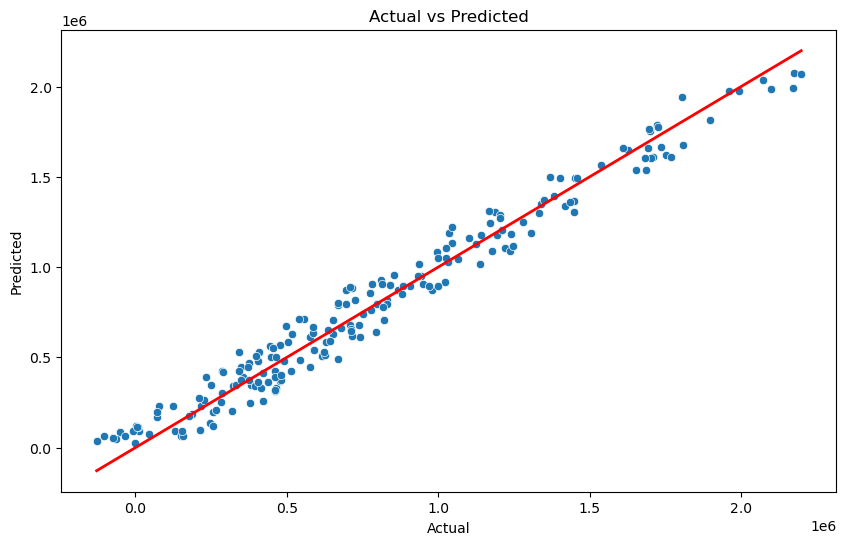

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [21]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
dataset

,Age,Experience,Salary
0,58,13,701136
1,48,39,1773631
2,34,21,573885
3,27,10,305378
4,40,22,779812
5,58,0,31572
6,38,36,1262900
7,42,20,968432
8,30,25,672692
9,30,35,1127208


In [22]:
data = pd.DataFrame([[48, 39]], columns=x.columns)
data_ss = ss.transform(data)
knr.predict(data_ss)

array([1846581.2])

In [23]:
data1 = pd.DataFrame([[27, 10]], columns=x.columns)
data1_ss = ss.transform(data1)
knr.predict(data1_ss)

array([245102.])

In [24]:
data2 = pd.DataFrame([[58, 0]], columns=x.columns)
data2_ss = ss.transform(data2)
knr.predict(data2_ss)

array([81407.1])

In [25]:
data3 = pd.DataFrame([[43, 22]], columns=x.columns)
data3_ss = ss.transform(data3)
knr.predict(data3_ss)

array([899778.2])

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms=MinMaxScaler()
x_train_mms=mms.fit_transform(x_train)
x_test_mms=mms.transform(x_test)

In [33]:
knr2=KNeighborsRegressor(n_neighbors=10)
knr2.fit(x_train_mms,y_train)

KNeighborsRegressor(n_neighbors=10)

In [37]:
knr2.score(x_train_mms,y_train)*100,knr2.score(x_test_mms,y_test)*100

(97.56000340058506, 97.0973688718953)

In [36]:
for i in range(1,30):
    knr3=KNeighborsRegressor(n_neighbors=i)
    knr3.fit(x_train_mms,y_train)
    print(i,knr3.score(x_train_mms,y_train)*100,knr1.score(x_test_mms,y_test)*100)

1 99.00930420630148 96.77332289222228
2 98.64531232433262 96.77332289222228
3 98.20142884176775 96.77332289222228
4 97.99462674076314 96.77332289222228
5 97.9062071089363 96.77332289222228
6 97.82246842521855 96.77332289222228
7 97.73482437212033 96.77332289222228
8 97.69263415813295 96.77332289222228
9 97.6474706822682 96.77332289222228
10 97.56000340058506 96.77332289222228
11 97.51727115889179 96.77332289222228
12 97.48989851445207 96.77332289222228
13 97.46712696242994 96.77332289222228
14 97.4338777122446 96.77332289222228
15 97.42990301919237 96.77332289222228
16 97.40462440178659 96.77332289222228
17 97.36160646564731 96.77332289222228
18 97.33573276902145 96.77332289222228
19 97.31458551104086 96.77332289222228
20 97.28435243238387 96.77332289222228
21 97.25672955486799 96.77332289222228
22 97.24209654379308 96.77332289222228
23 97.211419100688 96.77332289222228
24 97.20847170547202 96.77332289222228
25 97.18444305940857 96.77332289222228
26 97.15675764684663 96.77332289222228


In [38]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
dataset

,Age,Experience,Salary
0,58,13,701136
1,48,39,1773631
2,34,21,573885
3,27,10,305378
4,40,22,779812
5,58,0,31572
6,38,36,1262900
7,42,20,968432
8,30,25,672692
9,30,35,1127208


In [40]:
y_pred1 = knr.predict(x_test_mms)

In [42]:
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse)
r2_1 = r2_score(y_test, y_pred1)

In [43]:
mae1,mse1,rmse1,r2_1

(465333.71349999995,
 286649651872.30164,
 94300.45342291282,
 0.05589978531827666)

In [44]:
data9 = pd.DataFrame([[48, 39]], columns=x.columns)
data9_ss = ss.transform(data9)
knr2.predict(data9_ss)

array([1962708.8])

In [45]:
data0 = pd.DataFrame([[43, 42]], columns=x.columns)
data0_ss = ss.transform(data0)
knr2.predict(data0_ss)

array([1103957.4])